In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pickle
from collections import defaultdict
# Setup plotting
plt.style.reload_library()
FONTSIZE = 16
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'xtick.labelsize': FONTSIZE,
                     'ytick.labelsize': FONTSIZE,
                     # legend fontsize
                    'legend.fontsize': FONTSIZE,
                     'axes.titlesize': 20,
                     })

import sys
sys.path.extend(["../..", "."])
from nebula.misc import get_path
SCRIPT_PATH = get_path(type="notebook")
REPO_ROOT = os.path.join(SCRIPT_PATH, "..", "..")

from nebula.evaluation.roc import allign_metrics, report_alligned_metrics, get_roc, get_preds
from nebula.misc.plots import plot_roc_curve, plot_cv_metrics_dict, set_size


RUN_END_FILTER = "r1763_t5"

cruparamer_val = defaultdict(list)
INFOLDER = "out_cruparamer_5_folds"
run_folders = [x for x in os.listdir(INFOLDER) if "cv" in x]
for folder in run_folders:
    key = folder.split("_")[1]
    print(key, folder)
    existing_pickle = os.path.join(INFOLDER, f"{key}_roc_metrics_val_{RUN_END_FILTER}.pkl")
    if os.path.exists(existing_pickle):
        metrics = pickle.load(open(existing_pickle, "rb"))
        cruparamer_val[key] = metrics
    else:
        raise FileNotFoundError(f"Could not find {existing_pickle}")

speakeasy_val = defaultdict(list)
INFOLDER = "out_speakeasy"
run_folders = [x for x in os.listdir(INFOLDER) if "cv" in x and RUN_END_FILTER in x]
for folder in run_folders:
    key = folder.split("_")[1]
    print(key, folder)
    existing_pickle = os.path.join(INFOLDER, f"{key}_roc_metrics_val_{RUN_END_FILTER}.pkl")
    if os.path.exists(existing_pickle):
        metrics = pickle.load(open(existing_pickle, "rb"))
        speakeasy_val[key] = metrics
    else:
        raise FileNotFoundError(f"Could not find {existing_pickle}")

speakeasy_test = defaultdict(list)
INFOLDER = "out_speakeasy"
run_folders = [x for x in os.listdir(INFOLDER) if "cv" in x and RUN_END_FILTER in x]
for folder in run_folders:
    key = folder.split("_")[1]
    print(key, folder)
    existing_pickle = os.path.join(INFOLDER, f"{key}_roc_metrics_test_{RUN_END_FILTER}.pkl")
    if os.path.exists(existing_pickle):
        metrics = pickle.load(open(existing_pickle, "rb"))
        speakeasy_test[key] = metrics
    else:
        raise FileNotFoundError(f"Could not find {existing_pickle}")


nebula cv_nebula_limNone_r1763_t5
neurlux cv_neurlux_limNone_r1763_t5
quovadis cv_quovadis_limNone_r1763_t5
dmds cv_dmds_limNone_r1763_t5
nebula cv_nebula_limNone_r1763_t5
neurlux cv_neurlux_limNone_r1763_t5
quovadis cv_quovadis_limNone_r1763_t5
dmds cv_dmds_limNone_r1763_t5
nebula cv_nebula_limNone_r1763_t5
neurlux cv_neurlux_limNone_r1763_t5
quovadis cv_quovadis_limNone_r1763_t5


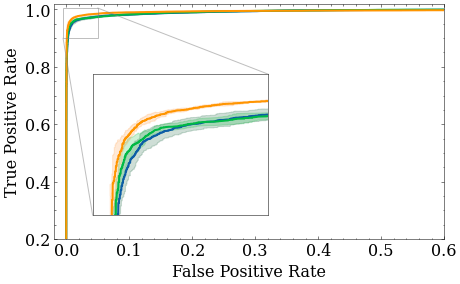

In [64]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(cruparamer_val)
#base_fpr_test, tprs_mean_test, tprs_std_test = allign_metrics(crupametrics_test)

XLIM = [-0.02, 0.6]
YLIM = [0.2, 1.02]

fig, ax = plt.subplots(1, 1, figsize=set_size())
axin = ax.inset_axes([0.1, 0.1, 0.45, 0.6])
# Hide inset axis ticks
axin.set_xticks([])
axin.set_yticks([])

for key in ['nebula', 'neurlux', 'quovadis']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, ylim=YLIM, xlim=XLIM)
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=axin, ylim=[0.9, 1.005], xlim=[-0.005, 0.05])
# Add the lines to indicate where the inset axis is coming from
_ = ax.indicate_inset_zoom(axin)
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Jindal et al.", "Trizna", "Ours"]
new_handles = [handles[1], handles[2], handles[0]]
#ax.legend(new_handles, new_labels, loc='lower right')

ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_cruparamer_data_val.pdf"), dpi=300, bbox_inches='tight')

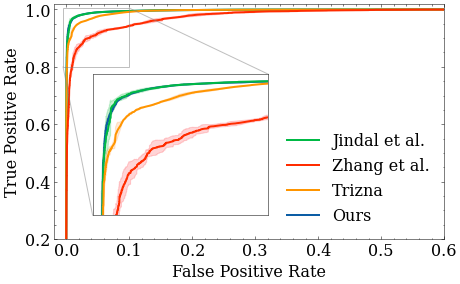

In [65]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_val)

fig, ax = plt.subplots(1, 1, figsize=set_size())
axin = ax.inset_axes([0.1, 0.1, 0.45, 0.6])
# Hide inset axis ticks
axin.set_xticks([])
axin.set_yticks([])

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, ylim=YLIM, xlim=XLIM)
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=axin, ylim=[0.8, 1.005], xlim=[-0.005, 0.1])
    # Add the lines to indicate where the inset axis is coming from
_ = ax.indicate_inset_zoom(axin)

# get legend handles
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Jindal et al.", "Zhang et al.", "Trizna", "Ours"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]
ax.legend(new_handles, new_labels, loc='lower right')
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_val.pdf"), dpi=300, bbox_inches='tight')

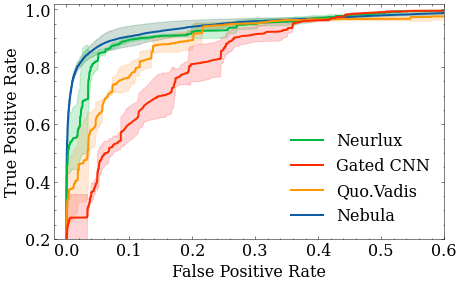

In [66]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_test)

fig, ax = plt.subplots(1, 1, figsize=set_size())

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, ylim=YLIM, xlim=XLIM, semilogx=False)
    # Add the lines to indicate where the inset axis is coming from
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Neurlux", "Gated CNN", "Quo.Vadis", "Nebula"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]
ax.legend(new_handles, new_labels, loc='lower right')
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_test.pdf"), dpi=300, bbox_inches='tight')

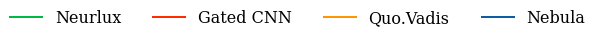

In [40]:
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Neurlux", "Gated CNN", "Quo.Vadis", "Nebula"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]

# create new ax for legend
figlegend = plt.figure(figsize=(10, 0.5))
axi = figlegend.add_subplot(111)
axi.legend(new_handles, new_labels, loc='center', ncol=4, fontsize=FONTSIZE)
# remove axis
axi.axis('off')

# save legend separately from plot as pdf in repo_root/img
plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_legend.pdf"), dpi=300, bbox_inches='tight')

# semilogx

Text(0.5, 0, 'False Positive Rate')

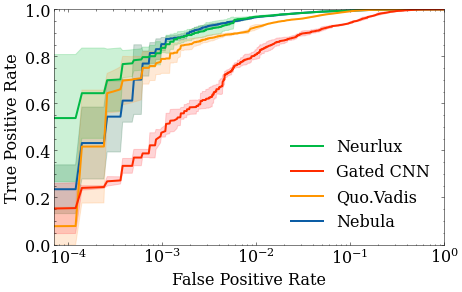

In [57]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_val)

def plot_roc_curve(fpr, tpr, tpr_std=None, model_name="", ax=None, xlim=[-0.0005, 0.003], ylim=[0.3, 1.0], roc_auc=None, linestyle="-", color=None, semilogx=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    if roc_auc:
        label = f"{model_name} (AUC = {roc_auc:.6f})"
    else:
        label = model_name
    if semilogx:
        ax.semilogx(fpr, tpr, lw=2, label=label, linestyle=linestyle, color=color)
    else:
        ax.plot(fpr, tpr, lw=2, label=label, linestyle=linestyle, color=color)
    if tpr_std is not None:
        tprs_upper = np.minimum(tpr + tpr_std, 1)
        tprs_lower = tpr - tpr_std
        color = ax.lines[-1].get_color()
        color = color[:-2] + "33"
        ax.fill_between(fpr, tprs_lower, tprs_upper, alpha=.2, color=color)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

fig, ax = plt.subplots(1, 1, figsize=set_size())
# axin = ax.inset_axes([0.1, 0.1, 0.45, 0.6])
# # Hide inset axis ticks
# axin.set_xticks([])
# axin.set_yticks([])

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, xlim=[0.7e-4,1], ylim=[0,1], semilogx=True)#, ylim=YLIM, xlim=XLIM)
    #plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=axin, ylim=[0.8, 1.005], xlim=[-0.005, 0.1])
    # Add the lines to indicate where the inset axis is coming from
#_ = ax.indicate_inset_zoom(axin)

# get legend handles
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Neurlux", "Gated CNN", "Quo.Vadis", "Nebula"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]
ax.legend(new_handles, new_labels, loc='lower right')
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
# plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_val.pdf"), dpi=300, bbox_inches='tight')

Text(0.5, 0, 'False Positive Rate')

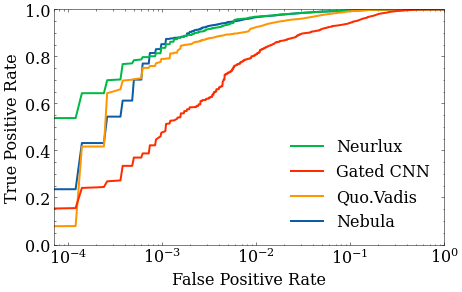

In [54]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_val)

fig, ax = plt.subplots(1, 1, figsize=set_size())
# axin = ax.inset_axes([0.1, 0.1, 0.45, 0.6])
# # Hide inset axis ticks
# axin.set_xticks([])
# axin.set_yticks([])

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], None, model_name=key, ax=ax, xlim=[0.7e-4,1], ylim=[0,1], semilogx=True)#, ylim=YLIM, xlim=XLIM)
    #plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=axin, ylim=[0.8, 1.005], xlim=[-0.005, 0.1])
    # Add the lines to indicate where the inset axis is coming from
#_ = ax.indicate_inset_zoom(axin)

# get legend handles
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Neurlux", "Gated CNN", "Quo.Vadis", "Nebula"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]
ax.legend(new_handles, new_labels, loc='lower right')
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)


# savefig as pdf in repo_root/img
# plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_val.pdf"), dpi=300, bbox_inches='tight')

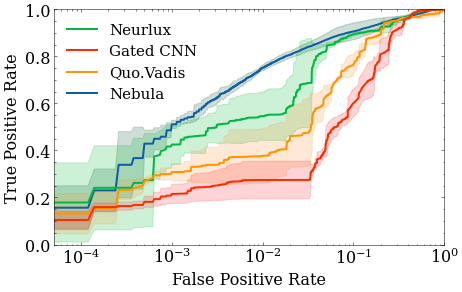

In [82]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_test)

fig, ax = plt.subplots(1, 1, figsize=set_size())

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, xlim=[0.5e-4,1], ylim=[0,1], semilogx=True)
    # Add the lines to indicate where the inset axis is coming from
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Neurlux", "Gated CNN", "Quo.Vadis", "Nebula"]
new_handles = [handles[1], handles[3], handles[2], handles[0]]
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)
# put legend above plot
ax.legend(new_handles, new_labels, fontsize=FONTSIZE-1)#, loc='lower right')
#ax.legend(new_handles, new_labels, loc='lower right', bbox_to_anchor=(0.9, 1.1), ncol=4, fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_test_logx.pdf"), dpi=300, bbox_inches='tight')

Text(0.5, 0, 'False Positive Rate')

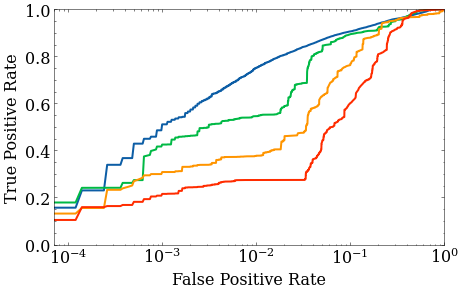

In [58]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(speakeasy_test)

fig, ax = plt.subplots(1, 1, figsize=set_size())

for key in ['nebula', 'neurlux', 'quovadis', 'dmds']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], None, model_name=key, ax=ax, xlim=[0.7e-4,1], ylim=[0,1], semilogx=True)
    # Add the lines to indicate where the inset axis is coming from
# handles, labels = ax.get_legend_handles_labels()
# new_labels = ["Jindal et al.", "Zhang et al.", "Trizna", "Ours"]
# new_handles = [handles[1], handles[3], handles[2], handles[0]]
# ax.legend(new_handles, new_labels, loc='lower right')
ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
# plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_speakeasy_data_test.pdf"), dpi=300, bbox_inches='tight')

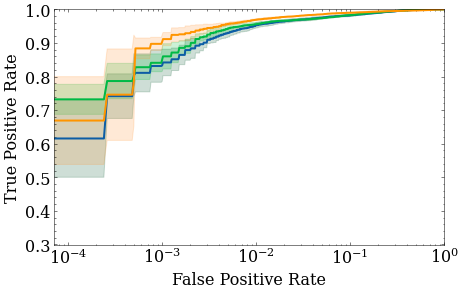

In [63]:
base_fpr_val, tprs_mean_val, tprs_std_val = allign_metrics(cruparamer_val)
#base_fpr_test, tprs_mean_test, tprs_std_test = allign_metrics(crupametrics_test)

XLIM = [-0.02, 0.6]
YLIM = [0.2, 1.02]

fig, ax = plt.subplots(1, 1, figsize=set_size())
# axin = ax.inset_axes([0.1, 0.1, 0.45, 0.6])
# # Hide inset axis ticks
# axin.set_xticks([])
# axin.set_yticks([])

for key in ['nebula', 'neurlux', 'quovadis']:
    plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=ax, xlim=[0.7e-4,1], ylim=[0.3,1], semilogx=True)
    #plot_roc_curve(base_fpr_val, tprs_mean_val[key], tprs_std_val[key], model_name=key, ax=axin, ylim=[0.9, 1.005], xlim=[-0.005, 0.05])
# Add the lines to indicate where the inset axis is coming from
# _ = ax.indicate_inset_zoom(axin)
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Jindal et al.", "Trizna", "Ours"]
new_handles = [handles[1], handles[2], handles[0]]
#ax.legend(new_handles, new_labels, loc='lower right')

ax.set_ylabel("True Positive Rate", fontsize=FONTSIZE)
ax.set_xlabel("False Positive Rate", fontsize=FONTSIZE)

# savefig as pdf in repo_root/img
# plt.savefig(os.path.join(REPO_ROOT, "img", "roc_curve_cruparamer_data_val.pdf"), dpi=300, bbox_inches='tight')